In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv(r"drive/MyDrive/CNNMNIST/A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[10 rows x 785 columns]


In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

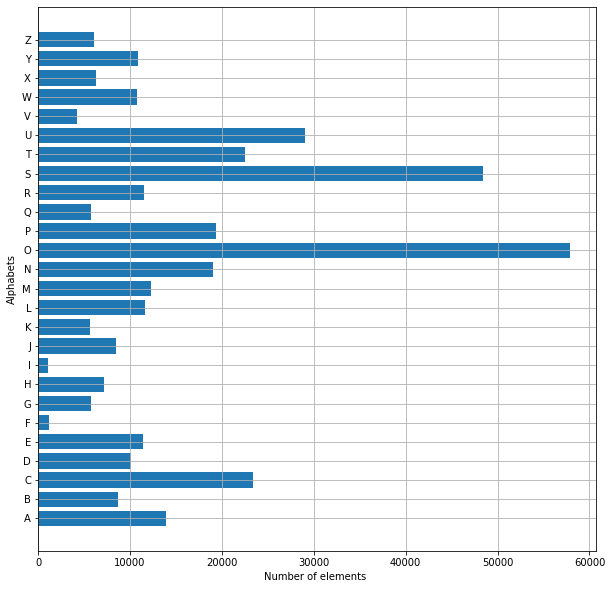

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

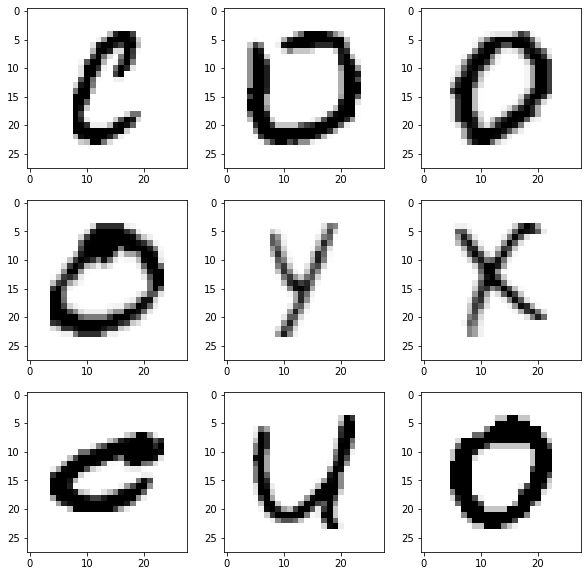

In [ ]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

New shape of train data:  (297960, 28, 28, 1)


In [ ]:
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (74490, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Flatten())
model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(64,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=20,  validation_data = (test_X,test_yOHE))

Epoch 1/20
9312/9312 [==============================] - 82s 9ms/step - loss: 0.0134 - accuracy: 0.9578 - val_loss: 0.0060 - val_accuracy: 0.9779
Epoch 2/20
9312/9312 [==============================] - 82s 9ms/step - loss: 0.0047 - accuracy: 0.9824 - val_loss: 0.0048 - val_accuracy: 0.9817
Epoch 3/20
9312/9312 [==============================] - 84s 9ms/step - loss: 0.0037 - accuracy: 0.9861 - val_loss: 0.0038 - val_accuracy: 0.9864
Epoch 4/20
9312/9312 [==============================] - 81s 9ms/step - loss: 0.0033 - accuracy: 0.9878 - val_loss: 0.0034 - val_accuracy: 0.9879
Epoch 5/20
9312/9312 [==============================] - 80s 9ms/step - loss: 0.0030 - accuracy: 0.9889 - val_loss: 0.0040 - val_accuracy: 0.9867
Epoch 6/20
9312/9312 [==============================] - 83s 9ms/step - loss: 0.0029 - accuracy: 0.9897 - val_loss: 0.0035 - val_accuracy: 0.9886
Epoch 7/20
9312/9312 [==============================] - 83s 9ms/step - loss: 0.0027 - accuracy: 0.9904 - val_loss: 0.0044 - val_ac

In [ ]:
model.summary()
model.save(r'drive/MyDrive/CNNMNIST/model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.977929949760437, 0.981675386428833, 0.9864277243614197, 0.9879312515258789, 0.986696183681488, 0.9886159300804138, 0.9874076843261719, 0.9879312515258789, 0.988199770450592, 0.985622227191925, 0.9880655407905579, 0.9854879975318909, 0.9866559505462646, 0.9877836108207703, 0.9849510192871094, 0.9867364764213562, 0.9881728887557983, 0.9850718379020691, 0.9810847043991089, 0.9871929287910461]
The training accuracy is : [0.9578332901000977, 0.9824338555335999, 0.9860954284667969, 0.9878339171409607, 0.9889380931854248, 0.9897201061248779, 0.9904047250747681, 0.9907135367393494, 0.9907940626144409, 0.9909383654594421, 0.9908074736595154, 0.9911498427391052, 0.9907202124595642, 0.9908913969993591, 0.9905456900596619, 0.9904886484146118, 0.9890857934951782, 0.9898308515548706, 0.9882971048355103, 0.9870519638061523]
The validation loss is : [0.006023352034389973, 0.004827262368053198, 0.003772563533857465, 0.003416333580389619, 0.003990562632679939, 0.003498915

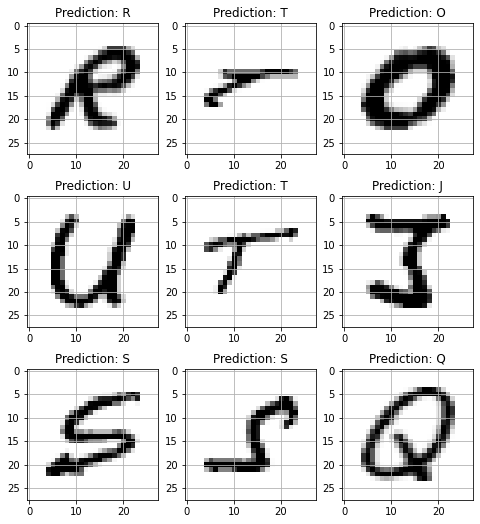

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
img = cv2.imread(r'drive/MyDrive/CNNMNIST/img_a.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

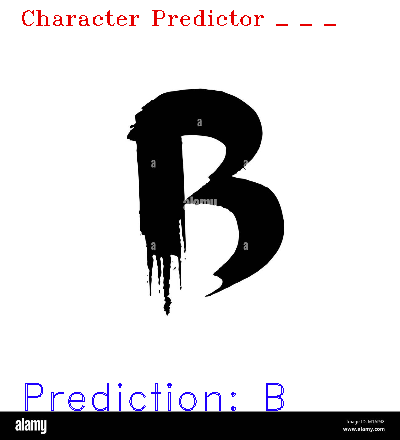

-1

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
from google.colab.patches import cv2_imshow
cv2.putText(img, "Character Predictor _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2_imshow(img)
cv2.waitKey()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


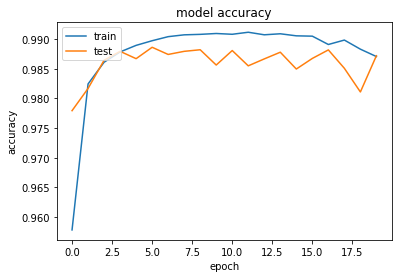

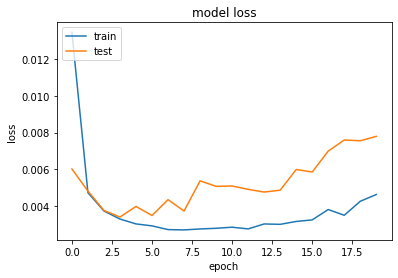

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = model.predict(test_X)
pred = np.argmax(pred, axis=1)
y_test = np.argmax(test_yOHE, axis=1)

In [ ]:
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      2754
           B       1.00      0.98      0.99      1728
           C       0.99      0.99      0.99      4608
           D       0.98      0.96      0.97      2070
           E       0.99      0.99      0.99      2397
           F       1.00      0.96      0.98       226
           G       0.99      0.97      0.98      1141
           H       0.98      0.95      0.96      1513
           I       1.00      0.97      0.99       250
           J       0.99      0.98      0.99      1745
           K       0.99      0.97      0.98      1142
           L       1.00      0.97      0.98      2255
           M       1.00      0.98      0.99      2508
           N       0.98      0.99      0.98      3725
           O       0.99      1.00      0.99     11683
           P       1.00      0.99      1.00      3849
           Q       0.99      0.98      0.99      1158
           R       0.99    

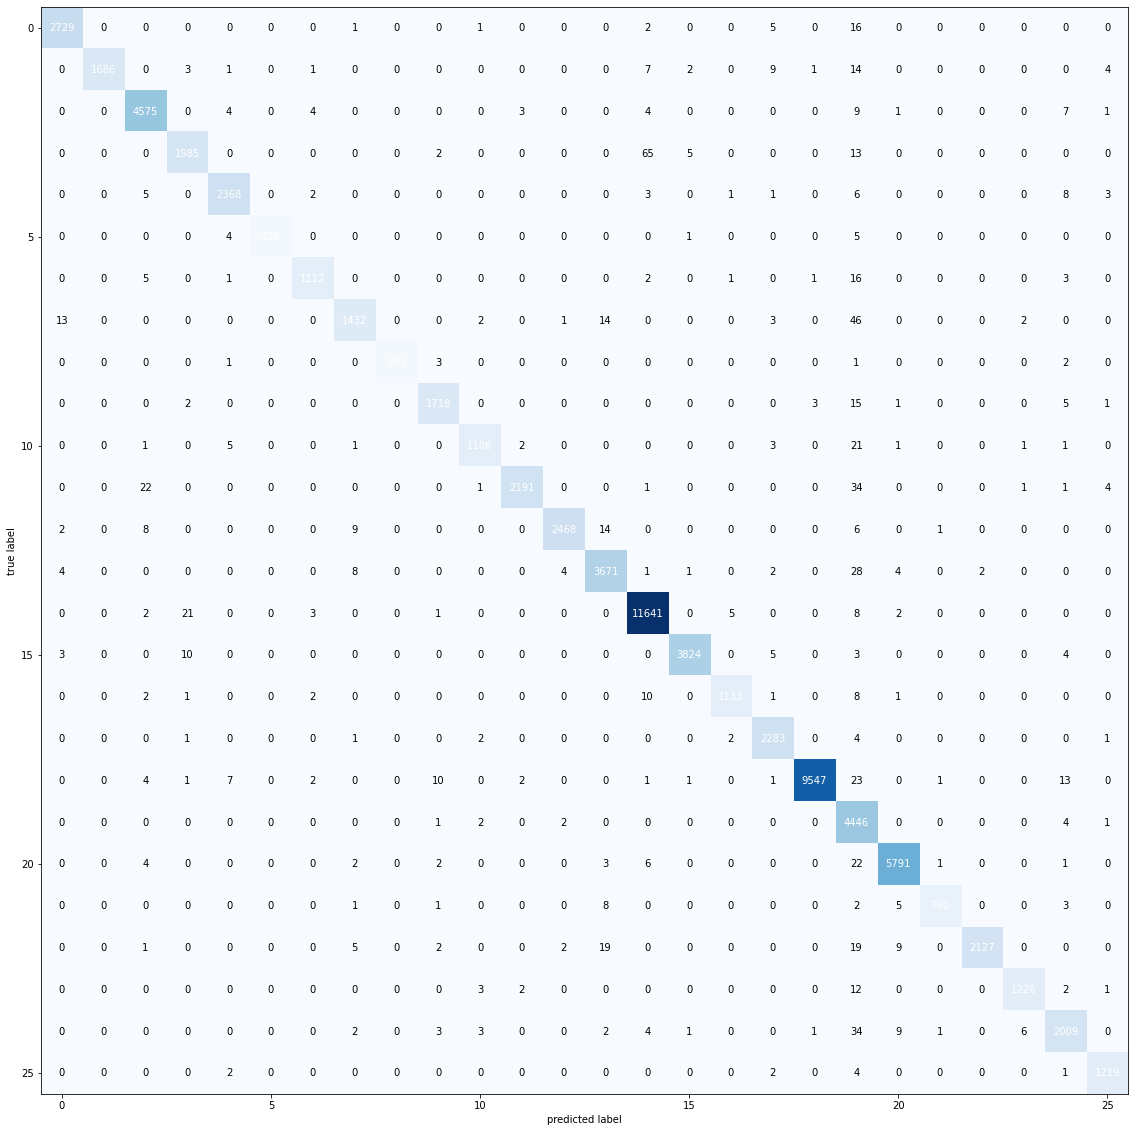

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=pred, 
                  binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('confusion_matrix.png')